<h1> <center> &#127756 Parcial I Física Computacional &#127826 </center> </h1>

<h3> <center> <em> Sebastián Marín, Gabriela E. Díaz, J. Sebastián Useche </em> </center> </h3>
<h4> <center> <em> Programa de Física, Facultad de Ciencias Básicas y Tecnologías </em> </center></h4>
<br><br>
<center> Trabajo realizado en: </center> 
 
![logo jupyter](jup_logo.png)

In [1]:
# Librerías
%autosave 60
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

Autosaving every 60 seconds


In [2]:
# Abriendo archivo csv
datos = pd.read_csv("METABRIC_RNA_Mutation.csv")
datos.columns[:31]

C:\Users\s\AppData\Local\Temp\ipykernel_16908\565455140.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv("METABRIC_RNA_Mutation.csv")


Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

<h2> Primer paso: selección y explicación de variables </h2>
<hr>
<p>Inicialmente, se seleccionan las variables que se utilizarán y se analiza cada columna individualmente para determinar si tiene un significado coherente en el modelo que se vaya a realizar. Así, la contribución de cada columna es la siguiente:</p>
<ul>
    <li> <b> cancer_type_detailed:</b> Contiene la información específica del tipo de cáncer detectado.</li>
    <li> <b> lymph_nodes_examined_positive:</b> Describe cuantos ganglios linfáticos han detectado células cancerosas. </li>
    <li> <b> overall_survival:</b> si el paciente esta vivo o muerto. </li>
    <li> <b> tumor_size: </b> tamaño del tumor en mm. </li>
    <li> <b> chemotherapy: </b> Si el paciente fue tratado o no con quimioterapia. </li>
</ul>

In [3]:
# Tabla de las variables seleccionadas
analisis = pd.DataFrame(datos, columns = ["overall_survival", "chemotherapy", "cancer_type_detailed",
                                      "lymph_nodes_examined_positive", "tumor_size"])
analisis

,overall_survival,chemotherapy,cancer_type_detailed,lymph_nodes_examined_positive,tumor_size
0,1,0,Breast Invasive Ductal Carcinoma,10.0,22.0
1,1,0,Breast Invasive Ductal Carcinoma,0.0,10.0
2,0,1,Breast Invasive Ductal Carcinoma,1.0,15.0
3,1,1,Breast Mixed Ductal and Lobular Carcinoma,3.0,25.0
4,0,1,Breast Mixed Ductal and Lobular Carcinoma,8.0,40.0
...,...,...,...,...,...
1899,1,0,Breast Invasive Lobular Carcinoma,1.0,25.0
1900,0,0,Breast Invasive Ductal Carcinoma,1.0,20.0
1901,0,0,Breast Invasive Ductal Carcinoma,45.0,25.0
1902,0,0,Breast Invasive Ductal Carcinoma,12.0,25.0


In [4]:
analisis.info()
analisis.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   overall_survival               1904 non-null   int64  
 1   chemotherapy                   1904 non-null   int64  
 2   cancer_type_detailed           1889 non-null   object 
 3   lymph_nodes_examined_positive  1904 non-null   float64
 4   tumor_size                     1884 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 74.5+ KB


overall_survival                  0
chemotherapy                      0
cancer_type_detailed             15
lymph_nodes_examined_positive     0
tumor_size                       20
dtype: int64

<h2> Segundo paso </h2>
<hr>
<p> Ahora, se deben eliminar aquellos datos que no aporten a la base de datos, es decir, los valores nulos; ya que pueden generar errores en los diferentes parámetros estadísticos que se calculen como la mediana, el promedio, la media, entre otros.</p>
<p> El propósito de la siguiente celda es eliminar aquellas filas cuyos valores <b>NO</b> nulos ocupen al menos un 80% de los datos, ya que consideramos que si faltan al menos dos datos de cada paciente, puede dificultar el diagnóstico del mismo. El resultado fue que se eliminaron 6 filas. Posteriormente, se rectificó que no hubiesen identificaciones duplicadas en la base de datos, ya que es el único dato irrepetible.</p>

In [6]:
# Porcentaje de valores no nulos para la limpieza
porcentaje = 0.8

# Eliminación de valores nulos con cierto umbral
limpieza_1 = analisis.dropna(thresh = porcentaje*len(analisis.columns))
limpieza_1 = limpieza_1.dropna(thresh = porcentaje*len(analisis), axis = 1)
limpieza_1

,overall_survival,chemotherapy,cancer_type_detailed,lymph_nodes_examined_positive,tumor_size
0,1,0,Breast Invasive Ductal Carcinoma,10.0,22.0
1,1,0,Breast Invasive Ductal Carcinoma,0.0,10.0
2,0,1,Breast Invasive Ductal Carcinoma,1.0,15.0
3,1,1,Breast Mixed Ductal and Lobular Carcinoma,3.0,25.0
4,0,1,Breast Mixed Ductal and Lobular Carcinoma,8.0,40.0
...,...,...,...,...,...
1899,1,0,Breast Invasive Lobular Carcinoma,1.0,25.0
1900,0,0,Breast Invasive Ductal Carcinoma,1.0,20.0
1901,0,0,Breast Invasive Ductal Carcinoma,45.0,25.0
1902,0,0,Breast Invasive Ductal Carcinoma,12.0,25.0


In [8]:
# Planteamiento de ecuación
# ===============================================================================================

# Creación de vector de variable dependiente
var_dep = "overall_survival"
y = limpieza_1.loc[:, var_dep]

# Variables categóricas
variables = pd.get_dummies(data = limpieza_1, columns = ['cancer_type_detailed'])

# Renombrando columnas
analisis1 = variables.rename(columns = {"cancer_type_detailed_Breast Invasive Ductal Carcinoma": "ctd_Breast_Invasive_Ductal_Carcinoma",
                                   "cancer_type_detailed_Breast Invasive Lobular Carcinoma": "ctd_Breast_Invasive_Lobular_Carcinoma",
                                  "cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma": "ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma",
                                  "cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma": "ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma",
                                  "cancer_type_detailed_Metaplastic Breast Cancer": "ctd_Metaplastic_Breast_Cancer",
                                  "death_from_cancer_Died of Disease": "death_from_cancer_Died_of_Disease",
                                  "death_from_cancer_Died of Other Causes": "death_from_cancer_Died_of_Other_Causes"})
analisis2 = analisis1.drop(var_dep, axis = 1)
analisis2

,chemotherapy,lymph_nodes_examined_positive,tumor_size,cancer_type_detailed_Breast,ctd_Breast_Invasive_Ductal_Carcinoma,ctd_Breast_Invasive_Lobular_Carcinoma,ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma,ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma,ctd_Metaplastic_Breast_Cancer
0,0,10.0,22.0,0,1,0,0,0,0
1,0,0.0,10.0,0,1,0,0,0,0
2,1,1.0,15.0,0,1,0,0,0,0
3,1,3.0,25.0,0,0,0,0,1,0
4,1,8.0,40.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1899,0,1.0,25.0,0,0,1,0,0,0
1900,0,1.0,20.0,0,1,0,0,0,0
1901,0,45.0,25.0,0,1,0,0,0,0
1902,0,12.0,25.0,0,1,0,0,0,0


<AxesSubplot:>

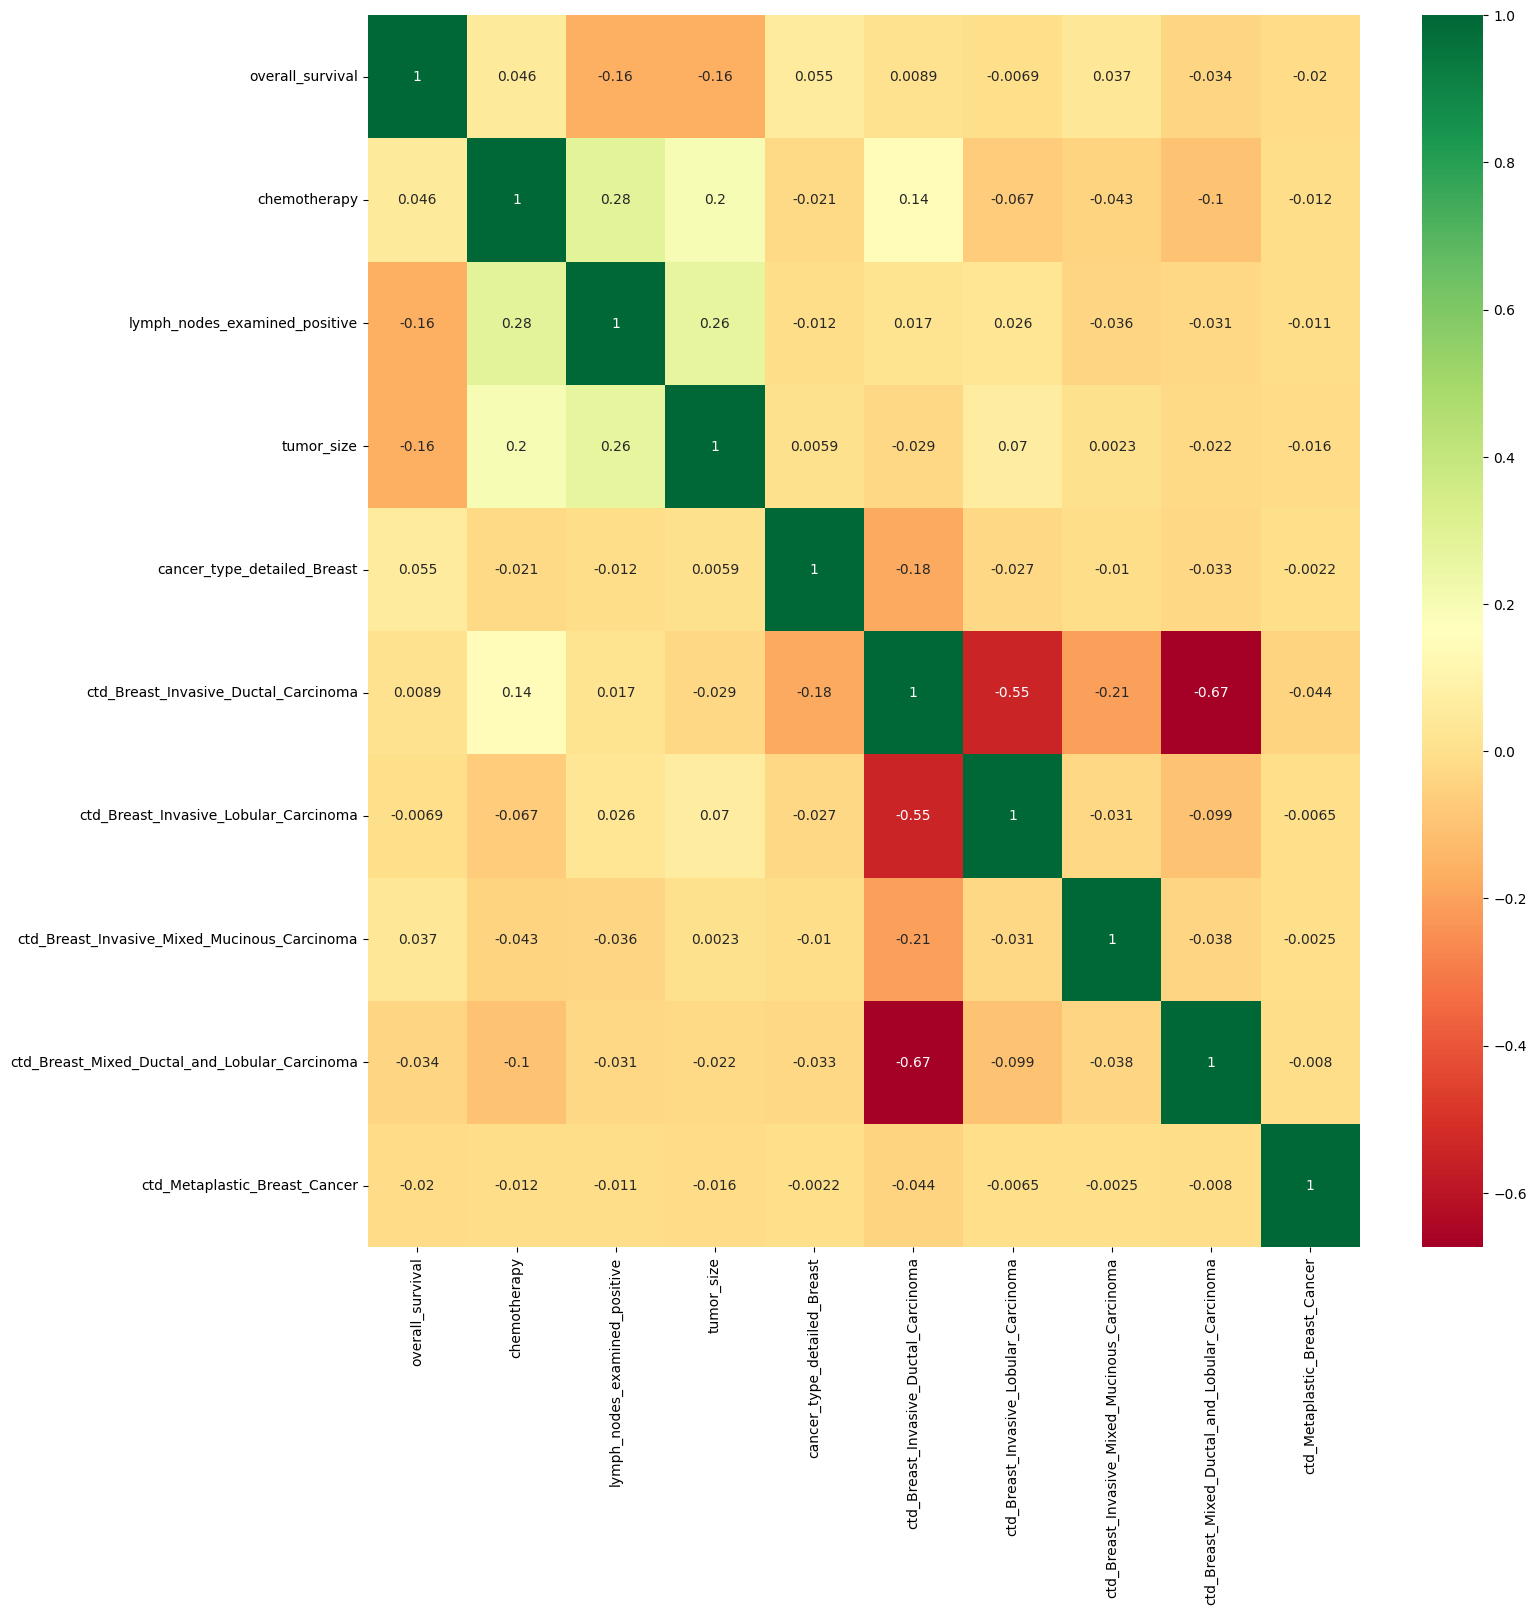

In [9]:
#comparando independencia entre variables
plt.figure(figsize = (16,16))
sns.heatmap(analisis1.corr(), annot = True, cmap = "RdYlGn")

In [9]:
# Tratamiento valores nulos
# ======================================================================

# Calculando media de columnas con valores nulos
def reemplazo_nulos(base_datos):
    for i in base_datos:
        if base_datos[i].any() == True:
            media = base_datos[i].mean()
            base_datos[i].fillna(media, inplace = True)
    return base_datos

analisis1 = reemplazo_nulos(analisis1)
analisis1.isnull().sum()

patient_id                                       0
overall_survival                                 0
neoplasm_histologic_grade                        0
lymph_nodes_examined_positive                    0
nottingham_prognostic_index                      0
tumor_size                                       0
hormone_therapy                                  0
cancer_type_detailed_Breast                      0
ctd_Breast_Invasive_Ductal_Carcinoma             0
ctd_Breast_Invasive_Lobular_Carcinoma            0
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma     0
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma    0
ctd_Metaplastic_Breast_Cancer                    0
cellularity_High                                 0
cellularity_Low                                  0
cellularity_Moderate                             0
death_from_cancer_Died_of_Disease                0
death_from_cancer_Died_of_Other_Causes           0
death_from_cancer_Living                         0
dtype: int64

<h1> Pruebas de normalidad </h1>
<hr>
<h2> D'Agostino </h2>

<p> A continuación, se realiza una prueba (llamada prueba D'Agostino), para determinar si los datos siguen o no una distribución normal, ya que la prueba de Shapiro es poco precisa para la cantidad de datos que tenemos en esta base de datos. </p>

<p> Así, la prueba de hipótesis que plantea D'Agostino es la siguiente:</p>

<p> $H_0:$ Los datos proceden de una distribución normal.</p>

<p> $H_1:$ Los datos no proceden de una distribución normal.</p>

<p> Si se rechaza $H_0$, se concluye que hay evidencia estadística suficiente para afirmar que los datos no siguen una distribución normal. Por lo tanto, las siguientes celdas se centrarán en realizar esta prueba y, en caso de no seguir una distribución normal, hacer una estandarización de los datos. </p>

In [10]:
for i in analisis1:
    k2, p_value = stats.normaltest(analisis1[i])
    print(f"{i} = {k2}, p_valor = {p_value}")

patient_id = 1031.4157023980508, p_valor = 1.0738063060534453e-224
overall_survival = 7332.254123491217, p_valor = 0.0
neoplasm_histologic_grade = 156.114306118142, p_valor = 1.2595318480138823e-34
lymph_nodes_examined_positive = 1573.4760743914558, p_valor = 0.0
nottingham_prognostic_index = 14.08499100849108, p_valor = 0.0008739429104918542
tumor_size = 1437.4947960022523, p_valor = 0.0
hormone_therapy = 8165.562753177722, p_valor = 0.0
cancer_type_detailed_Breast = 3040.361146308996, p_valor = 0.0
ctd_Breast_Invasive_Ductal_Carcinoma = 369.9506848949872, p_valor = 4.636918758685444e-81
ctd_Breast_Invasive_Lobular_Carcinoma = 1244.6048253334625, p_valor = 5.463816480362379e-271
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma = 2815.930890740889, p_valor = 0.0
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma = 920.0579540260592, p_valor = 1.6291225968970406e-200
ctd_Metaplastic_Breast_Cancer = 5789.266441834434, p_valor = 0.0
cellularity_High = 6836.9059408724215, p_valor = 0.0
cellularity_

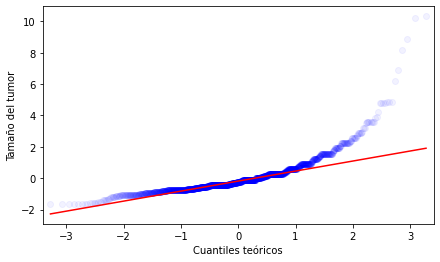

In [11]:
# Gráfico QQ
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(analisis1["tumor_size"], fit = True,  line = "q", alpha = 0.05, lw = 2, ax = ax)
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Tamaño del tumor")
plt.show()

<h2> Chi cuadrado </h2>
<hr>

In [22]:
# Chi cuadrado
from scipy.stats import chi2_contingency
  
# definiendo la tabla
data = [analisis1["overall_survival"], analisis1["tumor_size"]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpreta el p_valor
alpha = 0.05
print("El p-valor es: " + str(p))
if p <= alpha:
    print('Dependiente (rechaza H0)')
else:
    print('Independiente (H0 se mantiene verdadera)')


El p-valor es: 0.4362795630516269
Independiente (H0 se mantiene verdadera)


<h2> Estandarización de los datos </h2>

In [ ]:
from sklearn.preprocessing import StandardScaler
datos_estandarizados = StandardScaler().fit_transform(analisis1)
datos_estandarizados = pd.DataFrame(datos_estandarizados, columns = analisis1.columns)
datos_estandarizados.describe()

<h1> Modelo de regresión multilineal </h1>
<hr>

In [13]:
# Modelo de regresión lineal
def modelo(base_datos):
    xi = [var_dep + "~"]
    for i in base_datos:
        xi[0] = xi[0] + "+" + i
    return xi[0]

MRL = smf.ols(modelo(analisis2), datos_estandarizados).fit()
MRL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_survival   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.703e+30
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        03:28:01   Log-Likelihood:                 61191.
No. Observations:                1903   AIC:                        -1.223e+05
Df Residuals:                    1884   BIC:                        -1.222e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                      2.012e-15   2.78e-15      0.723      0.470   -3.45e-15    7.47e-15
patient_id                                     1.728e-19   2.64e-20      6.535      0.000    1.21e-19    2.25e-19
neoplasm_histologic_grade                      3.469e-18   1.39e-16      0.025      0.980    -2.7e-16    2.77e-16
lymph_nodes_examined_positive                  1.164e-16   1.96e-17      5.936      0.000     7.8e-17    1.55e-16
nottingham_prognostic_index                   -1.158e-15   9.48e-17    -12.218      0.000   -1.34e-15   -9.72e-16
tumor_size                                     1.521e-16   4.28e-18     35.556      0.000    1.44e-16     1.6e-16
hormone_therapy                               -1.167e-15   1.29e-16     -9.023      0.000   -1.42e-15   -9.14e-16
cancer_type_detailed_Breast                   -2.776e-16   9.55e-16     -0.291      0.771   -2.15e-15    1.59e-15
ctd_Breast_Invasive_Ductal_Carcinoma          -4.441e-16    7.1e-16     -0.626      0.532   -1.84e-15    9.48e-16
ctd_Breast_Invasive_Lobular_Carcinoma         -3.053e-16   7.41e-16     -0.412      0.680   -1.76e-15    1.15e-15
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma  -4.441e-16   9.08e-16     -0.489      0.625   -2.23e-15    1.34e-15
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma -4.857e-16   7.31e-16     -0.665      0.506   -1.92e-15    9.48e-16
ctd_Metaplastic_Breast_Cancer                 -1.665e-15   2.75e-15     -0.606      0.544   -7.05e-15    3.72e-15
cellularity_High                              -7.633e-16   3.74e-16     -2.041      0.041    -1.5e-15   -2.99e-17
cellularity_Low                               -7.043e-16   4.07e-16     -1.728      0.084    -1.5e-15    9.48e-17
cellularity_Moderate                          -7.806e-16   3.76e-16     -2.078      0.038   -1.52e-15    -4.4e-17
death_from_cancer_Died_of_Disease              8.188e-16   2.65e-15      0.309      0.757   -4.37e-15    6.01e-15
death_from_cancer_Died_of_Other_Causes         8.674e-18   2.65e-15      0.003      0.997   -5.19e-15     5.2e-15
death_from_cancer_Living                          1.0000   2.65e-15   3.78e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                      939.128   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10203.963
Skew:                          -2.054   Prob(JB):                         0.00
Kurtosis:                      13.574   Cond. No.                     4.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[

In [14]:
# Eliminando columnas cuyo P-valor supera 0.05
def limpiador_pvalor(base_datos, regresion):
    for i in base_datos:
        if regresion.pvalues[i] > 0.05:
            base_datos = base_datos.drop([i], axis = 1)
    return base_datos

analisis2 = datos_estandarizados.drop(var_dep, axis = 1)
analisis2 = limpiador_pvalor(analisis2, MRL)
analisis3 = pd.concat([analisis2, y], axis = 1)
analisis3

,patient_id,lymph_nodes_examined_positive,nottingham_prognostic_index,tumor_size,hormone_therapy,cellularity_High,cellularity_Moderate,death_from_cancer_Living,overall_survival
0,0,10.0,6.044,22.0,1,0,0,1,1
1,2,0.0,4.020,10.0,1,1,0,1,1
2,5,1.0,4.030,15.0,1,1,0,0,0
3,6,3.0,4.050,25.0,1,0,1,1,1
4,8,8.0,6.080,40.0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1899,7295,1.0,5.050,25.0,1,1,0,1,1
1900,7296,1.0,5.040,20.0,0,1,0,0,0
1901,7297,45.0,6.050,25.0,1,1,0,0,0
1902,7298,12.0,5.050,25.0,1,0,1,0,0


In [15]:
# Regresión con las variables contribuyentes al modelo
MRL_2 = smf.ols(modelo(), analisis3).fit()
MRL_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_survival   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.558e+31
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        03:28:01   Log-Likelihood:                 61951.
No. Observations:                1884   AIC:                        -1.239e+05
Df Residuals:                    1875   BIC:                        -1.238e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      8.465e-16   1.59e-16      5.322      0.000    5.35e-16    1.16e-15
patient_id                    -2.245e-19   1.27e-20    -17.679      0.000   -2.49e-19      -2e-19
lymph_nodes_examined_positive  3.708e-17    8.8e-18      4.212      0.000    1.98e-17    5.43e-17
nottingham_prognostic_index   -1.006e-16   3.18e-17     -3.164      0.002   -1.63e-16   -3.82e-17
tumor_size                     5.695e-17   2.05e-18     27.792      0.000    5.29e-17     6.1e-17
hormone_therapy               -2.602e-16   6.13e-17     -4.245      0.000    -3.8e-16    -1.4e-16
cellularity_High               7.286e-17   9.16e-17      0.795      0.427   -1.07e-16    2.53e-16
cellularity_Moderate          -5.213e-16   9.42e-17     -5.535      0.000   -7.06e-16   -3.37e-16
death_from_cancer_Living          1.0000   6.14e-17   1.63e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      915.857   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9975.859
Skew:                          -2.013   Prob(JB):                         0.00
Kurtosis:                      13.530   Cond. No.                     2.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h1> Prueba ANOVA </h1>
<hr>

In [16]:
# ANOVA
tabla_anova = sm.stats.anova_lm(MRL_2, typ = 3)
tabla_anova

,sum_sq,df,F,PR(>F)
Intercept,4.570536e-29,1.0,2.831992e+01,1.151649e-07
patient_id,5.044249e-28,1.0,3.125513e+02,8.210395e-65
lymph_nodes_examined_positive,2.863057e-29,1.0,1.774005e+01,2.652436e-05
nottingham_prognostic_index,1.615418e-29,1.0,1.000943e+01,1.582366e-03
tumor_size,1.246547e-27,1.0,7.723845e+02,1.202414e-142
hormone_therapy,2.908816e-29,1.0,1.802358e+01,2.288524e-05
cellularity_High,1.020336e-30,1.0,6.322193e-01,4.266430e-01
cellularity_Moderate,4.943831e-29,1.0,3.063292e+01,3.556679e-08
death_from_cancer_Living,4.279282e+02,1.0,2.651525e+32,0.000000e+00
Residual,3.026053e-27,1875.0,NaN,NaN


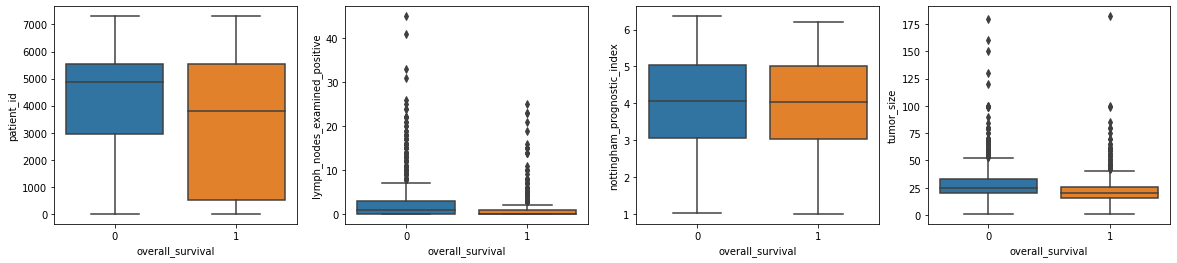

In [17]:
# variables utilizadas en el modelo de regresion 

import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for idx, feature in enumerate(list(analisis3.columns)[:4]):

    sns.boxplot( x='overall_survival', y=feature, data=analisis3, ax=axes[idx])
plt.show()

<p> Este escrito es una prueba de las ramas. </p>